In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df_train = pd.read_csv('criminal_train.csv')
df_test = pd.read_csv('criminal_test.csv')

In [3]:
df_train.set_index('PERID')
df_test.set_index('PERID')

,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
PERID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66583679,4,0,4,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,2,1,2,1,2,1,99,9,2,3,1,1,2,2,2,2,1,1,2,2,16346.795400,40020,1
35494679,4,0,4,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,3008.863906,40044,2
79424679,2,0,3,1,2,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,2,1,1,1,1,2,2,2,2,2,2,266.952503,40040,2
11744679,4,0,6,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,5,7,1,1,2,3,2,2,1,1,2,2,5386.928199,40017,1
31554679,1,0,4,1,3,1,1,1,99,1,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,1,7,1,1,2,3,2,1,1,1,2,2,173.489895,40017,1
83164679,1,0,6,1,4,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,2,1,99,9,1,2,1,1,1,1,2,2,1,1,2,2,562.268242,40035,2
58474679,4,0,2,1,1,1,2,1,99,99,1,94,2,2,99,99,2,99,99,99,99,99,99,99,99,2,3,1,1,2,1,2,1,99,9,98,98,1,1,1,1,1,1,1,1,2,1,2,1,2,1,2,1,99,9,1,3,3,3,2,2,1,2,1,1,2,2,24857.283570,40040,2
40695779,4,0,1,1,1,1,1,1,99,99,97,97,2,1,1,99,2,99,99,99,99,99,99,99,99,2,3,2,3,2,1,1,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,2,1,2,1,2,1,99,9,2,2,3,3,2,1,1,2,1,1,2,2,6219.428316,40015,2
39315779,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,2,1,2,1,2,1,99,9,3,6,1,1,2,3,2,2,2,3,2,2,5256.401262,40022,1


In [4]:
#Check for the statistics
df_train.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,4.571800e+04,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000
mean,5.445446e+07,3.355549,0.476486,3.426375,1.001706,2.084124,1.007437,1.162606,1.011024,97.394943,70.874098,2.371451,2.652085,2.224485,2.043200,39.552080,86.073953,12.847806,92.272890,89.323352,91.318190,97.102432,97.136883,97.148804,97.132071,97.137211,1.772475,1.019073,1.916729,1.009712,1.961787,1.005556,1.387462,1.013999,85.760160,7.881053,97.976574,97.976574,1.971499,1.103920,1.018461,1.855046,1.741174,1.144823,1.837941,1.018767,1.931602,1.018898,1.800035,1.009930,1.973205,1.014786,1.963844,1.011243,94.126887,8.524739,2.584649,4.750470,1.061420,1.194015,1.762676,2.338138,2.219410,2.234940,1.646135,1.764666,1.978936,1.978739,4692.661179,40023.739118,1.493854,0.069447
std,2.553911e+07,1.176651,0.888472,1.427420,0.061314,1.102988,0.123162,0.469029,0.146444,12.355156,44.325675,6.489921,8.948287,4.944784,7.809352,47.786379,33.008420,30.646313,24.257115,28.853064,25.805476,13.293939,13.049070,12.963239,13.083555,13.046715,0.419552,0.195279,0.276770,0.140284,0.192394,0.106916,0.487445,0.167787,33.348993,2.754865,1.510135,1.510135,8.988804,0.305589,0.192177,0.352431,4.071442,3.421477,0.368865,0.193734,0.252949,0.194398,0.400306,0.141819,0.162295,0.172350,0.187383,0.150698,20.472772,1.859006,1.985797,2.106725,0.345572,0.592239,0.425756,0.849732,5.295784,5.293651,0.618403,0.771411,0.144510,0.145161,5724.659486,265.140430,0.500230,0.254216
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.233189e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,99.000000,2.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,9.000000,98.

In [5]:
print('Counts')
print ('---------------------')
print(pd.value_counts(df_train['Criminal']))   
print ('---------------------')
print('% of Criminals - {}, % of Innocent - {}'.format(pd.value_counts(df_train['Criminal'])[0]/len(df_train), pd.value_counts(df_train['Criminal'])[1]/len(df_train)))

Counts
---------------------
0    42543
1     3175
Name: Criminal, dtype: int64
---------------------
% of Criminals - 0.9305525176079443, % of Innocent - 0.06944748239205564


<BarContainer object of 2 artists>

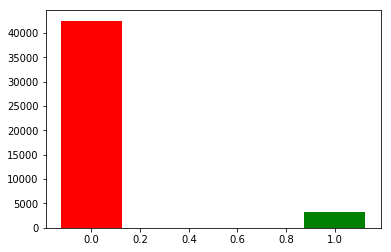

In [6]:
plt.bar([i for i in df_train['Criminal'].unique()]
        ,[i for i in pd.value_counts(df_train['Criminal'])]
        ,align='center', width = 0.25
        , color = ['red','green'])

In [7]:
df_train.corr()['Criminal'].sort_values()

IRPRVHLT    -0.204797
IRFAMIN3    -0.194889
GRPHLTIN    -0.194188
POVERTY3    -0.148304
IRMEDICR    -0.144131
IRPINC3     -0.128830
IRFAMSOC    -0.110676
NRCH17_2    -0.091212
IRINSUR4    -0.088959
OTHINS      -0.075629
HLCNOTYR    -0.069716
IRHHSIZ2    -0.068281
IFATHER     -0.049935
IRKI17_2    -0.039168
PRXYDATA    -0.038797
HLCALL99    -0.034450
HLCALLFG    -0.034450
VEREP       -0.007738
IIWELMOS    -0.007639
IRFAMSSI    -0.002666
IRFAMSVC    -0.000553
PERID       -0.000396
AIIND102     0.001484
GOVTPROG     0.001719
IRWELMOS     0.001917
MAIIN102     0.002309
VESTR        0.002355
IIHH65_2     0.004112
IRFAMPMT     0.004810
PRXRETRY     0.004966
IIKI17_2     0.005860
TOOLONG      0.007220
TROUBUND     0.007315
CELLNOTCL    0.007857
IRFSTAMP     0.009004
IIHHSIZ2     0.009238
IRCHMPUS     0.014456
CELLWRKNG    0.017935
HLCNOTMO     0.017954
ANALWT_C     0.020863
IIFSTAMP     0.024554
IIFAMSOC     0.026832
IIPINC3      0.029628
MEDICARE     0.031178
COUTYP2      0.031587
PDEN10    

In [8]:
# Check for -1 count
for i in df_train.columns:
    print (i, (df_train[i] == -1).sum())

PERID 0
IFATHER 2
NRCH17_2 84
IRHHSIZ2 2
IIHHSIZ2 2
IRKI17_2 2
IIKI17_2 2
IRHH65_2 2
IIHH65_2 2
PRXRETRY 2
PRXYDATA 2
MEDICARE 2
CAIDCHIP 2
CHAMPUS 2
PRVHLTIN 2
GRPHLTIN 2
HLTINNOS 2
HLCNOTYR 2
HLCNOTMO 2
HLCLAST 2
HLLOSRSN 2
HLNVCOST 2
HLNVOFFR 2
HLNVREF 2
HLNVNEED 2
HLNVSOR 2
IRMCDCHP 2
IIMCDCHP 2
IRMEDICR 2
IIMEDICR 2
IRCHMPUS 2
IICHMPUS 2
IRPRVHLT 2
IIPRVHLT 2
IROTHHLT 2
IIOTHHLT 2
HLCALLFG 2
HLCALL99 2
ANYHLTI2 2
IRINSUR4 2
IIINSUR4 2
OTHINS 2
CELLNOTCL 2
CELLWRKNG 2
IRFAMSOC 2
IIFAMSOC 2
IRFAMSSI 2
IIFAMSSI 2
IRFSTAMP 2
IIFSTAMP 2
IRFAMPMT 2
IIFAMPMT 2
IRFAMSVC 2
IIFAMSVC 2
IRWELMOS 2
IIWELMOS 2
IRPINC3 2
IRFAMIN3 2
IIPINC3 2
IIFAMIN3 2
GOVTPROG 2
POVERTY3 343
TOOLONG 2
TROUBUND 2
PDEN10 2
COUTYP2 2
MAIIN102 2
AIIND102 2
ANALWT_C 2
VESTR 2
VEREP 2
Criminal 0


In [9]:
##def fillna_values(column):
    # Fill -1 values with the most common occurence. 
    # This approcah is followed since we have very less values of -1 for each column.
 #   value = pd.value_counts(df_train[column]).idxmax()
  #  df_train[column] = df_train[column].replace(-1, value)
  #  df_test[column] = df_test[column].replace(-1, value)

In [10]:
#for i in df_train.columns:
 #   if (df_train[i] == -1).sum() > 0:
  #      fillna_values(i)

In [11]:
df_train.describe()
# Min value of every column is 1. So -1 is replaced.

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,4.571800e+04,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000
mean,5.445446e+07,3.355549,0.476486,3.426375,1.001706,2.084124,1.007437,1.162606,1.011024,97.394943,70.874098,2.371451,2.652085,2.224485,2.043200,39.552080,86.073953,12.847806,92.272890,89.323352,91.318190,97.102432,97.136883,97.148804,97.132071,97.137211,1.772475,1.019073,1.916729,1.009712,1.961787,1.005556,1.387462,1.013999,85.760160,7.881053,97.976574,97.976574,1.971499,1.103920,1.018461,1.855046,1.741174,1.144823,1.837941,1.018767,1.931602,1.018898,1.800035,1.009930,1.973205,1.014786,1.963844,1.011243,94.126887,8.524739,2.584649,4.750470,1.061420,1.194015,1.762676,2.338138,2.219410,2.234940,1.646135,1.764666,1.978936,1.978739,4692.661179,40023.739118,1.493854,0.069447
std,2.553911e+07,1.176651,0.888472,1.427420,0.061314,1.102988,0.123162,0.469029,0.146444,12.355156,44.325675,6.489921,8.948287,4.944784,7.809352,47.786379,33.008420,30.646313,24.257115,28.853064,25.805476,13.293939,13.049070,12.963239,13.083555,13.046715,0.419552,0.195279,0.276770,0.140284,0.192394,0.106916,0.487445,0.167787,33.348993,2.754865,1.510135,1.510135,8.988804,0.305589,0.192177,0.352431,4.071442,3.421477,0.368865,0.193734,0.252949,0.194398,0.400306,0.141819,0.162295,0.172350,0.187383,0.150698,20.472772,1.859006,1.985797,2.106725,0.345572,0.592239,0.425756,0.849732,5.295784,5.293651,0.618403,0.771411,0.144510,0.145161,5724.659486,265.140430,0.500230,0.254216
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.233189e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,99.000000,2.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,9.000000,98.

In [12]:
X_train = df_train.drop('Criminal', axis = 1)
Y_train = df_train.Criminal

X_test = df_test

In [13]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train, Y_train, random_state = 1)

In [14]:
X_test1.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
22743,69351456,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,6,7,1,1,2,3,2,2,1,1,2,2,1265.030627,40012,2
42401,84164928,1,0,4,1,3,1,1,1,99,1,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,1,7,1,1,2,3,2,2,2,3,2,2,1131.060254,40011,1
12208,31896904,4,3,6,1,4,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,2,3,2,2,706.032340,40006,1
9407,51251064,4,2,4,1,3,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,2,1,99,9,5,5,1,1,1,2,2,2,1,1,2,2,5132.576122,40012,2
10278,12544284,1,0,4,1,2,1,1,1,99,1,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,1,7,1,3,2,3,2,2,2,2,2,2,1624.552808,40038,1


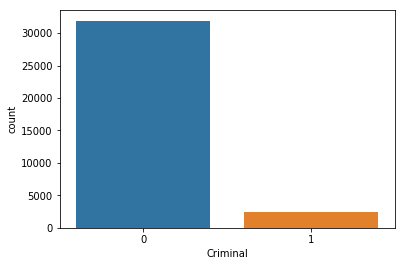

In [15]:
sns.countplot(Y_train1)

In [16]:
df_train_cpy = X_train1
df_train_cpy['Criminal'] = Y_train1

df_innc = df_train_cpy[df_train_cpy['Criminal'] == 1]
for i in range(11):
    df_train_cpy = df_train_cpy.append(df_innc)

c:\users\vkv\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


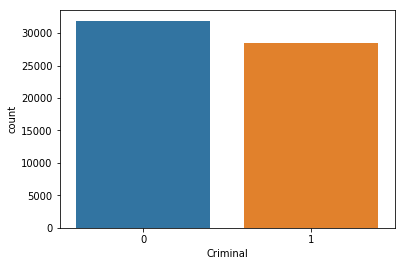

In [17]:
sns.countplot(df_train_cpy['Criminal'])

In [18]:
X_train_bal = df_train_cpy.drop('Criminal', axis = 1)
Y_train_bal = df_train_cpy.Criminal

In [19]:
X_train_bal1, X_test_bal1, Y_train_bal1, Y_test_bal1 = train_test_split(X_train_bal, Y_train_bal, random_state = 1)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf_random_bal = RandomForestClassifier(n_estimators=200, min_samples_leaf = 1, min_samples_split = 2)
clf_random_bal.fit(X_train_bal1, Y_train_bal1)
res_forest_bal = clf_random_bal.predict(X_test_bal1)
print('Score', clf_random_bal.score(X_test_bal1, Y_test_bal1))

res_for_pred = clf_random_bal.predict(X_test)

Score 0.9822434241038892


In [21]:
import xgboost as xgb

gbm_bal = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=350,
 max_depth=40,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 n_jobs=6,
 seed=2).fit(X_train_bal1, Y_train_bal1)

res_xgb_bal = gbm_bal.predict(X_test_bal1)
print('Score', gbm_bal.score(X_test_bal1, Y_test_bal1))
res_xgb_bal_pred = gbm_bal.predict(X_test)


c:\users\vkv\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\vkv\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Score 0.9838998211091234


c:\users\vkv\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [25]:
from sklearn.svm import SVC

clf_log = SVC(random_state = 1, kernel = 'rbf')
clf_log.fit(X_train_bal1, Y_train_bal1)
clf_log.score(X_test_bal1, Y_test_bal1)

1.0

In [29]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train_bal1, Y_train_bal1)
res_tree_bal = clf_tree.predict(X_test_bal1)
print('Score', clf_tree.score(X_test_bal1, Y_test_bal1))

res_tree_pred = clf_tree.predict(X_test)

Score 0.9812495859007487


In [26]:
res_svc = clf_log.predict(X_test)

In [45]:
#ensemble
arr_res = np.array([res_for_pred, res_xgb_bal_pred, res_tree_pred])
arr_res_ens = sum(arr_res)
arr_res_ens[arr_res_ens == 1] = 0
arr_res_ens[arr_res_ens > 1] = 1

print(arr_res_ens[arr_res_ens == 1])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [30]:
submission = pd.DataFrame({
    "PERID": X_test["PERID"],    
    "Criminal": res_tree_pred      
    })
submission.to_csv('Submissions.csv', index=False, columns= ['PERID', 'Criminal'])